<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

توضیحات کامل درون فایل گزارش قرار دارد

In [ ]:
#Before we begin, we need to understand the problem we are trying to find a solution for and gain insight of the
#preblems the world is facing right now.

#Our end goal is to find a vaccination trend which will help us predict the number of people getting vaccinated in the country.
#(I'll make a model for one country but it will work on any other countries/datasets)

#Beside predicting we need to gain info about the business side of vaccination and vaccine manufacturers for better risk management 
#and accelerate the vaccination process for people.

## Importing the libraries

In [8]:
#As usual our first step is importing libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

## Load and Prepare Data

In [59]:
#We have two different csv files both containing different type of vaccination data.
#We import them into two different dataframes.
#Before openning the notebook I took a look on the datasets files and based on their names I'll name them country and manufacturer.
country = pd.read_csv("country_vaccinations.csv")
manufacturer = pd.read_csv("country_vaccinations_by_manufacturer.csv")

## EDA

In [60]:
#As both of the datasets are important to our solution I will do EDA on country parallel with manufacturer.

Dataset 1 : country

In [61]:
#For gaining some simple info on the data in the dataset we need to see some random instances in the dataset.
country.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
12865,India,IND,2021-05-18,185191602.0,144270200.0,40921402.0,1374398.0,1618423.0,13.42,10.45,2.97,1173.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
22003,Papua New Guinea,PNG,2021-04-19,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,12.0,"Oxford/AstraZeneca, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
19475,Namibia,NAM,2021-05-24,NaN,NaN,NaN,NaN,2123.0,NaN,NaN,NaN,836.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Ministry of Health and Social Services,https://www.facebook.com/MoHSSNamibia/photos/a...
3057,Belize,BLZ,2021-04-17,NaN,NaN,NaN,NaN,1009.0,NaN,NaN,NaN,2538.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Ministry of Health,https://www.facebook.com/Belizehealth/photos/a...
3205,Benin,BEN,2021-07-09,NaN,NaN,NaN,NaN,461.0,NaN,NaN,NaN,38.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://covid19.who.int/


In [62]:
#We can get rid of some columns right away.(Based on the hypothesis that the data is valid)
country.drop(["source_name","source_website"],axis=1,inplace=True)

In [63]:
#As we can see the dataset countains many different columns which we need to deal with.
#It is not practical to work on all countries at the same time so I chose one country and analyse its data.
#First we need to see all countries in the dataset.
country["country"].value_counts()

Norway                              226
Latvia                              224
Scotland                            220
England                             220
Wales                               215
Northern Ireland                    215
United Kingdom                      215
Canada                              214
Russia                              213
China                               213
Denmark                             211
Israel                              209
United States                       208
Switzerland                         206
Liechtenstein                       206
Qatar                               206
Bahrain                             205
Mexico                              203
Costa Rica                          202
Cayman Islands                      202
Romania                             201
Czechia                             201
Austria                             201
Slovenia                            201
Chile                               201


In [64]:
#As we can see above, Norway has most instances in the dataset(which means it has the most statistical data)
#So We are gonna chose Norway for our analysis.

In [65]:
#Now that we have chosen Norway, we need to gather info about this country.
#First we get rid of all other instances in the dataset.
dataset = country.query('country == "Norway"')
dataset.tail(3) #Latest three days in the dataset.

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
21332,Norway,NOR,2021-07-13,4712859.0,3105804.0,1607055.0,31857.0,35106.0,86.93,57.29,29.64,6476.0,"Moderna, Pfizer/BioNTech"
21333,Norway,NOR,2021-07-14,4788962.0,3153225.0,1635737.0,76103.0,33872.0,88.34,58.16,30.17,6248.0,"Moderna, Pfizer/BioNTech"
21334,Norway,NOR,2021-07-15,4856669.0,3192871.0,1663798.0,67707.0,32483.0,89.59,58.90,30.69,5992.0,"Moderna, Pfizer/BioNTech"


In [66]:
#We need to check if there are any missing valaues in the dataset.
dataset.isnull().mean() * 100

country                                 0.000000
iso_code                                0.000000
date                                    0.000000
total_vaccinations                      0.000000
people_vaccinated                       0.000000
people_fully_vaccinated                18.141593
daily_vaccinations_raw                  0.442478
daily_vaccinations                      0.442478
total_vaccinations_per_hundred          0.000000
people_vaccinated_per_hundred           0.000000
people_fully_vaccinated_per_hundred    18.141593
daily_vaccinations_per_million          0.442478
vaccines                                0.000000
dtype: float64

In [67]:
#There are some missing values in important columns.
#We can't get rid of the column so we need to think of something better.

In [68]:
#We need to check for missing valus on the other dataset to.Then in the next step we can fill them.

Dataset 2 : manufacturer

In [69]:
#We need to repeat the steps from the country dataset.
#For gaining some simple info on the data in the dataset we need to see some random instances in the dataset.
manufacturer.sample(5)

,location,date,vaccine,total_vaccinations
1417,Czechia,2021-06-02,Moderna,519340
504,Chile,2021-04-25,Sinovac,12163771
6462,Lithuania,2021-07-11,Moderna,210442
7145,Romania,2021-03-20,Moderna,174732
7097,Romania,2021-03-04,Moderna,79862


In [70]:
#Are there any missing values?
manufacturer.isnull().mean() * 100

location              0.0
date                  0.0
vaccine               0.0
total_vaccinations    0.0
dtype: float64

In [71]:
#Fortunately there are no missing values!

In [72]:
#Compared to country this is a way smaller dataset(Number of columns)
#The first thing which comes to mind is that who are the manufacturers?
manufacturer_names = set(manufacturer["vaccine"].values)
manufacturer_names

{'CanSino',
 'Johnson&Johnson',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinovac',
 'Sputnik V'}

## Data Preprocessing

In [73]:
#The column "people_fully_vaccinated" is always ascending so we can use forward fill on it.
#(As time goes forward more people get vaccinated and the value of vaccinated people can not decrease)
people_fully_vaccinated = dataset.people_fully_vaccinated.ffill()

In [74]:
#The first few days which have missing values can be zero (no vaccination has been done)
people_fully_vaccinated = people_fully_vaccinated.fillna(0)

In [75]:
#Adding new column to the dataset.
del dataset['people_fully_vaccinated']
#dataset["people_fully_vaccinated"] = people_fully_vaccinated.values
dataset = dataset.join(people_fully_vaccinated)

In [76]:
#As we have "people_fully_vaccinated" we dont need the column "people_fully_vaccinated_per_hundred " as 
#it's the first columns percentage.So we can just delete the column.
del dataset['people_fully_vaccinated_per_hundred']

In [77]:
#I checked description of two columns "daily_vaccinations_raw" and "daily_vaccinations" on kaggle and they are exactly the same.
#So I'll delete one of them and fill the others missing values with mean().Because The Medical Infrastructure of countries 
#is not able to speed up the vaccination proccess very much.So the mean would be a good value for filling missing values.
del dataset["daily_vaccinations_raw"]
mean_value = dataset["daily_vaccinations"].mean()
dataset["daily_vaccinations"].fillna(value=mean_value, inplace=True)

In [78]:
#The last column containing missing values is "daily_vaccinations_per_million".As we have the column "daily_vaccinations" we
#delete this column.
del dataset["daily_vaccinations_per_million"]

In [79]:
#Now there are no values missing in the dataset.
dataset.isnull().mean() * 100

country                           0.0
iso_code                          0.0
date                              0.0
total_vaccinations                0.0
people_vaccinated                 0.0
daily_vaccinations                0.0
total_vaccinations_per_hundred    0.0
people_vaccinated_per_hundred     0.0
vaccines                          0.0
people_fully_vaccinated           0.0
dtype: float64

In [80]:
#As we are working with time series data we need to change the indexes of instances to dates.
dataset.set_index(["date"], inplace=True)

## Strorytelling - Visualization

In [81]:
#We have no data on vaccine quality so all of the vaccines are equal to us.
#Our goal is to vaccinate as many people as possible and it doesn't matter who made it.
#So we need to know which manufacturer can make more vaccines than others.
vaccine_count = {
    "CanSino" : manufacturer.query('vaccine == "CanSino"')["total_vaccinations"].sum(),
    "Johnson&Johnson" : manufacturer.query('vaccine == "Johnson&Johnson"')["total_vaccinations"].sum(),
    "Moderna" : manufacturer.query('vaccine == "Moderna"')["total_vaccinations"].sum(),
    "Oxford/AstraZeneca" : manufacturer.query('vaccine == "Oxford/AstraZeneca"')["total_vaccinations"].sum(),
    "Pfizer/BioNTech" : manufacturer.query('vaccine == "Pfizer/BioNTech"')["total_vaccinations"].sum(),
    "Sinopharm/Beijing" : manufacturer.query('vaccine == "Sinopharm/Beijing"')["total_vaccinations"].sum(),
    "Sinovac" : manufacturer.query('vaccine == "Sinovac"')["total_vaccinations"].sum(),
    "Sputnik V" : manufacturer.query('vaccine == "Sputnik V"')["total_vaccinations"].sum(),
}
names = pd.Series(vaccine_count.keys(),name="Name")
count = pd.Series(vaccine_count.values(),name="Count")
all_vaccine_world = manufacturer["total_vaccinations"].sum()
percent = list()
for i in count:
    div = i/all_vaccine_world
    per = div * 100
    percent.append(per)
percent = pd.Series(percent,name="Percent")
vaccine = pd.concat([names,count,percent],axis=1)
vaccine = vaccine.sort_values("Count",ascending=False)
vaccine

,Name,Count,Percent
4,Pfizer/BioNTech,33043499443,59.894268
2,Moderna,16100615737,29.183791
3,Oxford/AstraZeneca,2735776039,4.958836
6,Sinovac,1942688928,3.521296
1,Johnson&Johnson,1282709647,2.325025
5,Sinopharm/Beijing,28325183,0.051342
7,Sputnik V,24103447,0.043690
0,CanSino,12000606,0.021752


In [82]:
#It seems that Pfizer and Moderna are making 80% of vaccines world wide!
#Well it seems that if we want to change the vaccination trend we have to buy more vaccines from 
#pfizer and moderna.

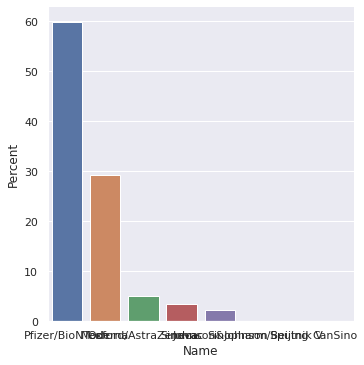

In [83]:
#This plot may show how far ahead pfizer is compared to other companies.
sns.catplot(x="Name", y="Percent",kind="bar",data=vaccine)

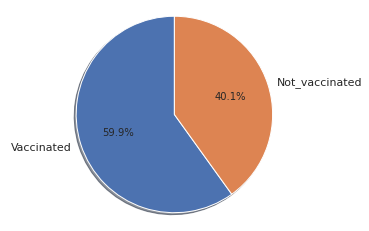

In [84]:
#How many people are left?
population = 5328000 #in million
vaccinated = dataset.tail(1)["people_vaccinated"]
vaccinated = float(vaccinated/population * 100)
not_vaccinated = 100 - vaccinated
labels = ["Vaccinated","Not_vaccinated"]
sizes = [vaccinated,not_vaccinated]
%matplotlib inline
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  
plt.show()

In [85]:
#As we can see the majority of people are vaccinated and 40% of people are left.

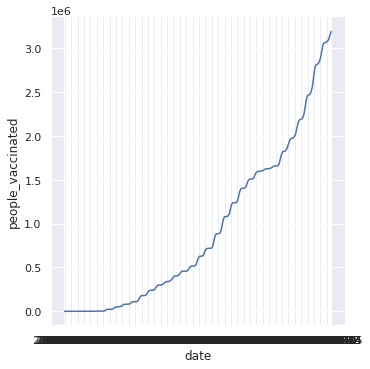

In [86]:
#It seems to be a good idea to plot the progres to gain insights on process.
sns.relplot(x=dataset.index, y=dataset["people_vaccinated"], kind="line", data=dataset)

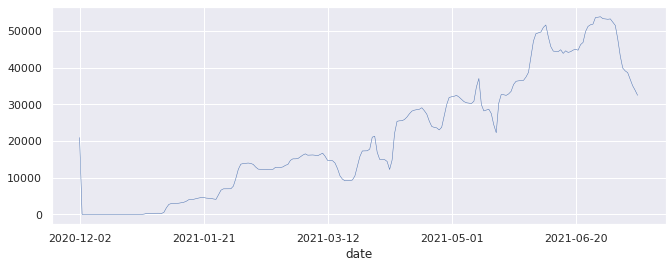

In [87]:
#The progress has a good uptrend and it seems theres no need to do anything special.
#The problem of the plot is that it only shows when the vaccination speed has decreased.
#For getting a better insight we plot another attribute : "daily_vaccinations"
sns.set(rc={'figure.figsize':(11, 4)})
dataset['daily_vaccinations'].plot(linewidth=0.5)

In [88]:
#It seems that vaccination count per day has also an uptrend.(Bravo Norway!)

Analysis Results

In [89]:
#This is my opinion about the results:
#The only manufacturers Norway can buy vaccines from are "pfizer" and "moderna".
#It is not hard for them to scale manufacturing to norways population.
#Fortunately Norway is a rich country and is able to pay an extra price for more vaccines
#and vaccinating people per day.
#Even if the government does nothing and keeps up with this trend they wont have any problems.

## Prepare Data for Machine learning

In [90]:
#Our goal is to make a model for predicting the trend of daily vaccination.
#We are predicting a value(number) so we have a regression problem.

In [91]:
#Preparing dataset for an algorithm with the wright columns.
#We can't use vaccine as an attribute because in the dataset we don't know how to divide instances based on them.
# (Which instance has which vaccine?)

In [92]:
#As we are working with time series data we will cut our dataset into train and test set.
y = dataset.tail(40)
X = dataset.head(226-40)

## Train your model

In [ ]:
#We wont use sklearn for ml.
#Instead of scaling data and encoding the dataset and ... I'm gonna use pycaret.
#It has as amazing workflow nad is easy to use.

In [102]:
model = setup(
data = X,
test_data = y,
numeric_imputation = 'mean',
target = "daily_vaccinations",
fold_strategy = 'timeseries',
fold = 3,
)

,Description,Value
0,session_id,8950
1,Target,daily_vaccinations
2,Original Data,"(186, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(186, 6)"


## Test the model and show the metrics

In [103]:
#Now that we have trained the models we need to find the best one.
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,5688.8237,5.218033e+07,7201.2082,-1.0283,0.5103,0.3180,0.0200
gbr,Gradient Boosting Regressor,5705.3774,5.274741e+07,7242.1805,-1.0427,0.5115,0.3170,0.0433
dt,Decision Tree Regressor,5710.7464,5.283168e+07,7247.9162,-1.0448,0.5117,0.3171,0.0200
et,Extra Trees Regressor,5710.7464,5.283168e+07,7247.9162,-1.0448,0.5117,0.3171,0.4667
rf,Random Forest Regressor,5711.6455,5.281338e+07,7244.5872,-1.0582,0.5168,0.3193,0.5267
knn,K Neighbors Regressor,5750.3346,5.337124e+07,7277.7046,-1.1028,0.5298,0.3252,0.0833
omp,Orthogonal Matching Pursuit,8461.2971,1.021348e+08,9565.2876,-2.0510,0.4114,0.4893,0.0167
lightgbm,Light Gradient Boosting Machine,8022.6201,9.468617e+07,9585.2213,-2.4658,0.7881,0.4348,0.1800
br,Bayesian Ridge,9431.5348,1.358681e+08,11288.1536,-3.6382,0.4499,0.5361,0.0167
par,Passive Aggressive Regressor,30011.2619,1.779337e+09,40065.3298,-58.4478,0.8708,1.5380,0.0167


In [104]:
#It seems that AdaBoost Regressor had the best score amoung others.
#So we need to check its capability.
ada = create_model("ada")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6718.3478,6.167178e+07,7853.1380,-2.6916,0.9647,0.5202
1,4943.9493,4.183849e+07,6468.2678,-0.0673,0.3519,0.2784
2,5404.1739,5.303071e+07,7282.2189,-0.3262,0.2141,0.1554
Mean,5688.8237,5.218033e+07,7201.2082,-1.0283,0.5103,0.3180
SD,751.8385,8.119204e+06,568.2655,1.1808,0.3262,0.1515


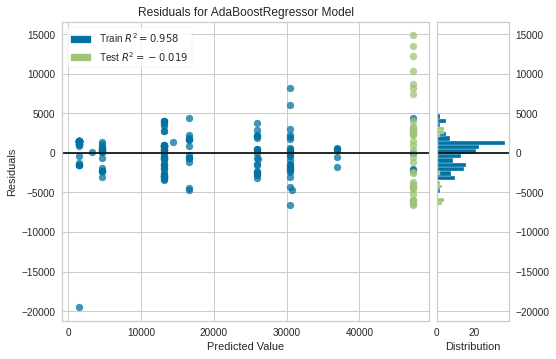

In [105]:
#It tested the model on 3 folds (as given in setup)
#Now we need to plot it to gain a better insight about the results.
plot_model(ada)

In [106]:
#It seems that the model is overfitting because of the difference between R^2 results.
#So we are gonna use Gradient Boosting Regressor and check if its better.
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6718.6755,6.167659e+07,7853.4445,-2.6919,0.9648,0.5203
1,4933.1957,4.261167e+07,6527.7617,-0.0870,0.3535,0.2739
2,5464.2609,5.395395e+07,7345.3354,-0.3492,0.2163,0.1569
Mean,5705.3774,5.274741e+07,7242.1805,-1.0427,0.5115,0.3170
SD,748.5931,7.829840e+06,546.1010,1.1710,0.3254,0.1515


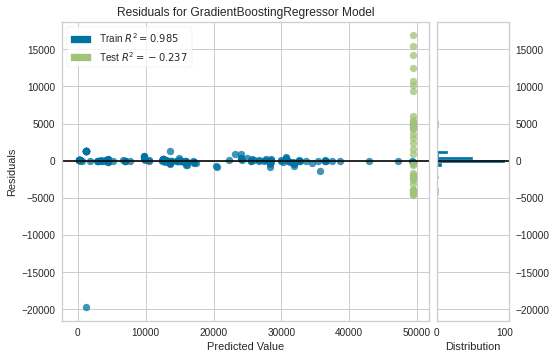

In [107]:
#It's similar to ada but we need to plot the model for a fare comparison.
plot_model(gbr)

In [ ]:
#The results show the ada model was better so are gonna use that for our prediction.

## Save your final model

In [ ]:
#Saving final model on pickle file for later use.

In [109]:
save_model(ada,"ardalan_ada_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='daily_vaccinations',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('dummy', Dummify(target='daily_vaccinations')),
                 ('fix_perfect', Remove_100(target='daily_vaccinations')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough

## Send us the Result (Maktabkhoone)